In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
columns=["sam_code_num","Clump_thick","Uni_of_Cell_Size","Uni_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoes","Class"]
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",names=columns,na_values="?")
data.head()

,sam_code_num,Clump_thick,Uni_of_Cell_Size,Uni_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoes,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sam_code_num                 699 non-null    int64  
 1   Clump_thick                  699 non-null    int64  
 2   Uni_of_Cell_Size             699 non-null    int64  
 3   Uni_of_Cell_Shape            699 non-null    int64  
 4   Marginal_Adhesion            699 non-null    int64  
 5   Single_Epithelial_Cell_Size  699 non-null    int64  
 6   Bare_Nuclei                  683 non-null    float64
 7   Bland_Chromatin              699 non-null    int64  
 8   Normal_Nucleoli              699 non-null    int64  
 9   Mitoes                       699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [6]:
data.isnull().sum()

sam_code_num                    0
Clump_thick                     0
Uni_of_Cell_Size                0
Uni_of_Cell_Shape               0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoes                          0
Class                           0
dtype: int64

In [7]:
data.Bare_Nuclei.unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [8]:
data.Bare_Nuclei.describe()

count    683.000000
mean       3.544656
std        3.643857
min        1.000000
25%        1.000000
50%        1.000000
75%        6.000000
max       10.000000
Name: Bare_Nuclei, dtype: float64

In [9]:
data.Bare_Nuclei.fillna(3.544656,inplace=True)

In [10]:
data.Bare_Nuclei.isnull().sum()

0

In [11]:
data.isnull().sum()

sam_code_num                   0
Clump_thick                    0
Uni_of_Cell_Size               0
Uni_of_Cell_Shape              0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoes                         0
Class                          0
dtype: int64

In [12]:
data.Clump_thick.describe()

count    699.000000
mean       4.417740
std        2.815741
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: Clump_thick, dtype: float64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sam_code_num                 699 non-null    int64  
 1   Clump_thick                  699 non-null    int64  
 2   Uni_of_Cell_Size             699 non-null    int64  
 3   Uni_of_Cell_Shape            699 non-null    int64  
 4   Marginal_Adhesion            699 non-null    int64  
 5   Single_Epithelial_Cell_Size  699 non-null    int64  
 6   Bare_Nuclei                  699 non-null    float64
 7   Bland_Chromatin              699 non-null    int64  
 8   Normal_Nucleoli              699 non-null    int64  
 9   Mitoes                       699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x232c5b87eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x232c6233550>,
 'boxes': [<matplotlib.lines.Line2D at 0x232c5b87b80>],
 'medians': [<matplotlib.lines.Line2D at 0x232c6233c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x232c6241040>],
 'means': []}

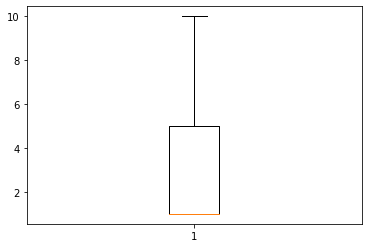

In [14]:
plt.boxplot(data.Bare_Nuclei)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
y=data.Class
print(y)

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64


In [17]:
x=data.drop(['sam_code_num','Class'],axis=1)
print(x)

     Clump_thick  Uni_of_Cell_Size  Uni_of_Cell_Shape  Marginal_Adhesion  \
0              5                 1                  1                  1   
1              5                 4                  4                  5   
2              3                 1                  1                  1   
3              6                 8                  8                  1   
4              4                 1                  1                  3   
..           ...               ...                ...                ...   
694            3                 1                  1                  1   
695            2                 1                  1                  1   
696            5                10                 10                  3   
697            4                 8                  6                  4   
698            4                 8                  8                  5   

     Single_Epithelial_Cell_Size  Bare_Nuclei  Bland_Chromatin  \
0                    

In [18]:
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.8,test_size=0.2,shuffle=False)

In [19]:
print(train_x)
print(test_x)
print(train_y)
print(test_y)

     Clump_thick  Uni_of_Cell_Size  Uni_of_Cell_Shape  Marginal_Adhesion  \
0              5                 1                  1                  1   
1              5                 4                  4                  5   
2              3                 1                  1                  1   
3              6                 8                  8                  1   
4              4                 1                  1                  3   
..           ...               ...                ...                ...   
554            3                 1                  1                  1   
555            4                 3                  1                  1   
556            5                 2                  2                  2   
557            5                 1                  1                  3   
558            2                 1                  1                  1   

     Single_Epithelial_Cell_Size  Bare_Nuclei  Bland_Chromatin  \
0                    

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(train_x,train_y)
model.score(train_x,train_y)

0.9588550983899821

In [21]:
predicted_value=model.predict(test_x)
print(predicted_value)

[2 2 2 2 2 2 4 2 2 4 4 4 4 2 2 4 2 2 2 2 2 2 4 4 2 2 2 4 2 4 2 4 4 4 2 4 2
 2 2 2 2 2 2 2 4 4 4 2 2 4 2 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2
 4 2 2 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 4 4
 4 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 2 2 2 2 2 4 2 2 2 2 4 4 4]


In [22]:
probability=model.predict_proba(test_x)
print(probability)

[[9.81959541e-01 1.80404594e-02]
 [9.75511112e-01 2.44888879e-02]
 [9.75511112e-01 2.44888879e-02]
 [9.97044403e-01 2.95559663e-03]
 [9.93726387e-01 6.27361309e-03]
 [9.83441946e-01 1.65580540e-02]
 [2.62048725e-04 9.99737951e-01]
 [9.88127692e-01 1.18723076e-02]
 [9.76455171e-01 2.35448289e-02]
 [3.03185606e-02 9.69681439e-01]
 [7.30802259e-04 9.99269198e-01]
 [6.86399482e-03 9.93136005e-01]
 [2.68228478e-04 9.99731772e-01]
 [9.93726387e-01 6.27361309e-03]
 [9.97835255e-01 2.16474459e-03]
 [2.66214762e-02 9.73378524e-01]
 [9.66216878e-01 3.37831218e-02]
 [9.81959541e-01 1.80404594e-02]
 [9.97835255e-01 2.16474459e-03]
 [9.97835255e-01 2.16474459e-03]
 [9.97044403e-01 2.95559663e-03]
 [9.75050075e-01 2.49499246e-02]
 [3.14308313e-03 9.96856917e-01]
 [1.10469546e-02 9.88953045e-01]
 [9.95400971e-01 4.59902877e-03]
 [9.57237064e-01 4.27629357e-02]
 [9.98414829e-01 1.58517057e-03]
 [5.69888974e-05 9.99943011e-01]
 [9.79412904e-01 2.05870960e-02]
 [2.56085218e-02 9.74391478e-01]
 [9.867330

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(test_y,predicted_value)

array([[105,   0],
       [  0,  35]], dtype=int64)

In [25]:
x=[["Clump_thick","Uni_of_Cell_Size","Uni_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoes"]]
y=[["Class"]]

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [27]:
y=le.fit_transform(y)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [28]:
from keras.models import Sequential

In [29]:
from keras.layers import Dense

In [30]:
from tensorflow.keras import layers

In [34]:
model=Sequential()
model.add(layers.Dense(8,input_dim=9,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(2,activation='relu'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
model.fit(train_x,train_y,epochs=50)

Epoch 1/50
18/18 [==============================] - 3s 5ms/step - loss: 42.2186 - accuracy: 0.0000e+00
Epoch 2/50
18/18 [==============================] - 0s 2ms/step - loss: 42.2186 - accuracy: 0.0000e+00
Epoch 3/50
18/18 [==============================] - 0s 2ms/step - loss: 42.2185 - accuracy: 0.0000e+00
Epoch 4/50
18/18 [==============================] - 0s 2ms/step - loss: 42.2186 - accuracy: 0.0000e+00
Epoch 5/50
18/18 [==============================] - 0s 2ms/step - loss: 42.2186 - accuracy: 0.0000e+00
Epoch 6/50
18/18 [==============================] - 0s 2ms/step - loss: 42.2186 - accuracy: 0.0000e+00
Epoch 7/50
18/18 [==============================] - 0s 1ms/step - loss: 42.2186 - accuracy: 0.0000e+00
Epoch 8/50
18/18 [==============================] - 0s 1ms/step - loss: 42.2186 - accuracy: 0.0000e+00
Epoch 9/50
18/18 [==============================] - 0s 1ms/step - loss: 42.2186 - accuracy: 0.0000e+00
Epoch 10/50
18/18 [==============================] - 0s 2ms/step - loss: 

In [49]:
model.evaluate(train_x,train_y)

18/18 [==============================] - 0s 1ms/step - loss: 42.2186 - accuracy: 0.0000e+00


[42.21855545043945, 0.0]